## Store Sales Forcast using Time Series Data

In [1]:
# importing the panada library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
# Loading the dataset or use glob to load the dataset

df1 = pd.read_csv("holidays_events.csv")
df2 = pd.read_csv("oil.csv")
df3 = pd.read_csv("stores.csv")
df4 = pd.read_csv("transactions.csv")
df5 = pd.read_csv("train.csv", index_col="date")
df6 = pd.read_csv("test.csv")

In [25]:
df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df.head()

,date,type,locale,locale_name,description,transferred,dcoilwtico,store_nbr,city,state,cluster,transactions,id,family,sales,onpromotion
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df = df.dropna()

In [40]:
df.head()

,date,type,locale,locale_name,description,transferred,dcoilwtico,store_nbr,city,state,cluster,transactions,id,family,sales,onpromotion


In [ ]:
df1.head()

In [21]:
df5.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


<AxesSubplot:xlabel='locale_name', ylabel='count'>

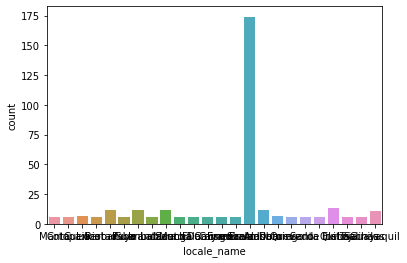

In [10]:
sns.countplot(data= df, x = "locale_name")

In [ ]:
plt.plot(kind="bar", x = df["type"], y = df["date"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [44]:
df6.head(10)

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0
2013-01-01,5,1,BREAD/BAKERY,0.0,0
2013-01-01,6,1,CELEBRATION,0.0,0
2013-01-01,7,1,CLEANING,0.0,0
2013-01-01,8,1,DAIRY,0.0,0


In [28]:
df6.duplicated().sum()

0

In [29]:
df.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [50]:
import numpy as np

df6["Time"] = np.arange(len(df6.index))


In [30]:
# sns.countplot(x = "sales", data = df6)

In [51]:
df6.head()

,id,store_nbr,family,sales,onpromotion,Time
date,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,0
2013-01-01,1,1,BABY CARE,0.0,0,1
2013-01-01,2,1,BEAUTY,0.0,0,2
2013-01-01,3,1,BEVERAGES,0.0,0,3
2013-01-01,4,1,BOOKS,0.0,0,4


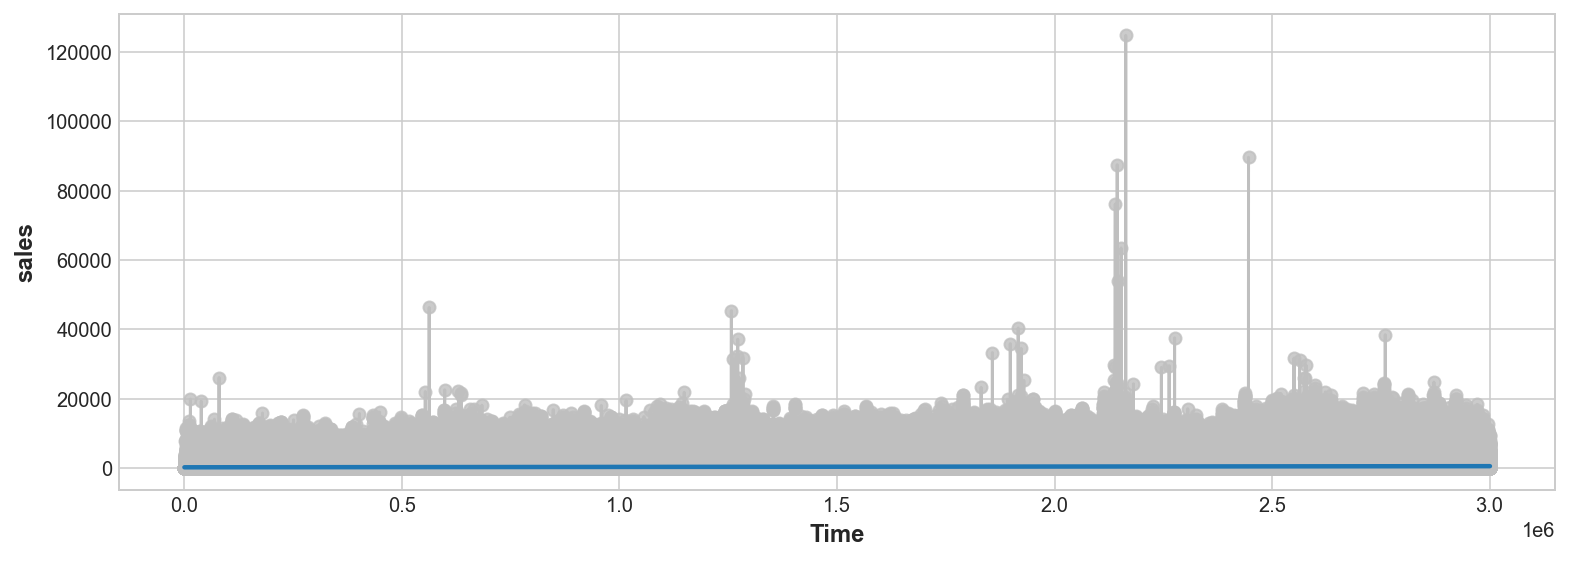

In [56]:
plt.style.use("seaborn-whitegrid")

plt.rc(
    "figure",
    autolayout = True,
    figsize=(11,4),
    titlesize=18,
    titleweight="bold"

)

plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10

)

%config InlineBackend .figure_format = "retina"


fig, ax = plt.subplots()
ax.plot("Time", "sales", data=df6, color= "0.75")
ax = sns.regplot(x="Time", y= "sales", data=df6, ci=None , scatter_kws=dict(color="0.75"))




In [53]:
df6["Time"].shape

(3000888,)